# Airbnb : Los Angeles

## Team: Pandas Express

# Intro

As reported by Investopedia.com, Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. Travelers can often book an Airbnb for less than the cost of a hotel room, and Airbnb hosts list many different kinds of properties—single rooms, a suite of rooms, apartments, moored yachts, houseboats, entire houses, even a castle—on the Airbnb website. This idea is certainly favorable for those who are looking for affordable housing options as compared to hotels. With over two-hundred sixty million guests who have booked and stayed in Airbnb properties across the world, Airbnb administers tons of data from all over the world. As current students in the Los Angeles Area, **Pandas Express has decided to analyze Airbnb data pertaining to Los Angeles City in order to gain further insights of the relationships variables. As a result, a deeper understanding of the cause of certain factors will be attained in the context of the data.**

# Background

The data used for this project is from Inside Airbnb. Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world. By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market.The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site, and the data has been analyzed, cleansed and aggregated where appropriate to faciliate public discussion.

# Variables

id: Listing ID

name: The name of the Listing

host_id: Host ID

host_name: Name of the Host

neighbourhood_group: Location

   - *This column is filled with blanks because Los Angeles is not divided into boroughs unlike New York City (Manhattan, Brooklyn, etc.)*

neighbourhood - Group

latitude - Latitude Coordinates

longitude - Longitude Coordinates

room_type - Listing Space Type

price - Price in Dollars

minimum_nights - Amount of Nights Minimum

number_of_reviews - Number of Reviews

last_review - Latest Review

reviews_per_month - Number of Reviews per Month

calculated_host_listings_count - Amount of Listings per Host

availability_365 - Number of Days When Listing is Available for Booking

review_scores_rating - Rating of the listings

listing_url - The listing webiste url

In [1]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Acquiring and Loading Data

In [2]:
# Same data with 106 columns
full_data = pd.read_csv('listings.csv.gz', compression = 'gzip')

In [3]:
# Data with 16 columns
data = pd.read_csv('listings.csv')

# Checking shape
print("The dataset has {} rows and {} columns.".format(*data.shape))
# ... and duplicates
print("It contains {} duplicates.".format(data.duplicated().sum()))

The dataset has 45053 rows and 16 columns.
It contains 0 duplicates.


In [4]:
# Add 'listing_url', 'review_scores_rating'
index = ['listing_url', 'review_scores_rating']
data['listing_url'] = full_data.listing_url
data['review_scores_rating'] = full_data.review_scores_rating

# Delete empty column
data.drop(['neighbourhood_group'], axis = 1, inplace = True)
data.head()

id                                               name  host_id  \
0   109  Amazing bright elegant condo park front *UPGRA...      521   
1   344                  Family perfect;Pool;Near Studios!      767   
2  2708  Fireplace Mirrored Mini Suit (Website hidden b...     3008   
3  2732                              Zen Life at the Beach     3041   
4  2864  *Upscale Professional Home with Beautiful Studio*     3207   

        host_name neighbourhood  latitude  longitude        room_type  price  \
0           Paolo   Culver City  33.98209 -118.38494  Entire home/apt    122   
1         Melissa       Burbank  34.16562 -118.33458  Entire home/apt    168   
2           Chas.     Hollywood  34.09768 -118.34602     Private room     79   
3  Yoga Priestess  Santa Monica  34.00475 -118.48127     Private room    140   
4       Bernadine    Bellflower  33.87619 -118.11397  Entire home/apt     80   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0              30                  2  2016-05-15               0.02   
1               2                  6  2018-10-21               0.15   
2              28                 21  2019-08-03               0.33   
3               1                 19  2019-08-03               0.19   
4               2                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  \
0                               1               165   
1                               1                 0   
2                               2               276   
3                               2               346   
4                               1                 0   

                         listing_url  review_scores_rating  
0   https://www.airbnb.com/rooms/109                  80.0  
1   https://www.airbnb.com/rooms/344                  93.0  
2  https://www.airbnb.com/rooms/2708                  98.0  
3  https://www.airbnb.com/rooms/2732                  96.0  
4  https://www.airbnb.com/rooms/2864                   NaN

Inside Airbnb provides a detailed version of our data. Therefore, we thought it would be resourceful to utilize some of the variables in the detailed dataset to achieve an improved analysis of our data. These columns would help us understand market trend. We also found an empty column and removed it from the data.

# Omit Outliers

In [5]:
# Check for numeric variables
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
listing_url                        object
review_scores_rating              float64
dtype: object

In [6]:
index = ['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365']
# Create a new dataframe that only contains numeric variables
sub = data[index]

In [7]:
# Using Z-Scores of the numeric variables to determine outliers
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    counter=0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(counter)
        counter += 1
    return feature_outliers

In [8]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in sub.columns:
    f_out = detect_outlier(sub[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))

--Feature and Outlier Counts--

price  outlier count : 152
minimum_nights  outlier count : 123
number_of_reviews  outlier count : 74
calculated_host_listings_count  outlier count : 309
availability_365  outlier count : 0
Total Unique Outlier Index Count: 657


In [9]:
# Create a new dataframe without the outliers
clean_data = data.drop(outliers,axis=0)
clean_data.describe()

id       host_id      latitude     longitude         price  \
count  4.439600e+04  4.439600e+04  44396.000000  44396.000000  44396.000000   
mean   2.220341e+07  8.142806e+07     34.052679   -118.322904    186.907559   
std    1.100411e+07  8.278083e+07      0.119507      0.155428    303.428926   
min    1.090000e+02  5.900000e+01     33.338480   -118.934220      0.000000   
25%    1.390042e+07  1.263034e+07     34.007340   -118.422490     70.000000   
50%    2.307901e+07  4.698851e+07     34.062970   -118.341845    110.000000   
75%    3.188351e+07  1.363326e+08     34.103372   -118.258628    185.000000   
max    3.860617e+07  2.946834e+08     34.811190   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    44396.000000       44396.000000       36270.000000   
mean         5.393076          33.068677           1.920767   
std         10.720669          56.276461           1.959955   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.390000   
50%          2.000000           9.000000           1.230000   
75%          3.000000          39.000000           2.930000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    44396.000000      44396.000000          35714.000000  
mean                         5.919317        161.171885             94.266786  
std                         10.887216        137.648830              8.688095  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         22.000000             93.000000  
50%                          2.000000        135.000000             97.000000  
75%                          5.000000        315.000000            100.000000  
max                         92.000000        365.000000            100.000000

Although we omitted the outliers, there still seems to be some misleading observations. Some of the prices were even zero, and this is highly unreasonable. Thus, we decided to omit all observations where price is less than $10.

In [10]:
# Delete price under $10
clean_data = clean_data[data["price"] >= 10]
clean_data.describe()

id       host_id      latitude     longitude         price  \
count  4.438700e+04  4.438700e+04  44387.000000  44387.000000  44387.000000   
mean   2.220360e+07  8.143009e+07     34.052689   -118.322901    186.945457   
std    1.100513e+07  8.278646e+07      0.119506      0.155423    303.448013   
min    1.090000e+02  5.900000e+01     33.338480   -118.934220     10.000000   
25%    1.390012e+07  1.263034e+07     34.007370   -118.422460     70.000000   
50%    2.308048e+07  4.698851e+07     34.062970   -118.341840    110.000000   
75%    3.188495e+07  1.363326e+08     34.103375   -118.258625    185.000000   
max    3.860617e+07  2.946834e+08     34.811190   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    44387.000000       44387.000000       36262.000000   
mean         5.393854          33.067497           1.920741   
std         10.721612          56.276933           1.959904   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.390000   
50%          2.000000           9.000000           1.230000   
75%          3.000000          39.000000           2.930000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    44387.000000      44387.000000          35706.000000  
mean                         5.919503        161.184333             94.265978  
std                         10.888186        137.645934              8.688854  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         22.500000             93.000000  
50%                          2.000000        135.000000             97.000000  
75%                          5.000000        315.500000            100.000000  
max                         92.000000        365.000000            100.000000

# Drop Missing Values

In [11]:
clean_data.isna().sum()

id                                   0
name                                 6
host_id                              0
host_name                           16
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8125
reviews_per_month                 8125
calculated_host_listings_count       0
availability_365                     0
listing_url                          0
review_scores_rating              8681
dtype: int64

In [12]:
# Drop selected fields in place
clean_data.dropna(inplace=True, axis=0)    

In [13]:
clean_data.shape

(35688, 17)

In [14]:
clean_data.describe()

id       host_id      latitude     longitude         price  \
count  3.568800e+04  3.568800e+04  35688.000000  35688.000000  35688.000000   
mean   2.104552e+07  7.638688e+07     34.052909   -118.321061    161.648145   
std    1.072531e+07  7.886392e+07      0.113485      0.154314    212.819892   
min    1.090000e+02  5.900000e+01     33.338690   -118.934220     10.000000   
25%    1.316795e+07  1.157821e+07     34.005300   -118.421840     70.000000   
50%    2.195596e+07  4.339360e+07     34.062470   -118.340070    106.000000   
75%    3.013720e+07  1.272693e+08     34.102940   -118.257410    175.000000   
max    3.852527e+07  2.935799e+08     34.781480   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    35688.000000       35688.000000       35688.000000   
mean         4.863399          41.093197           1.946659   
std          9.974233          60.066075           1.963738   
min          1.000000           1.000000           0.010000   
25%          1.000000           5.000000           0.420000   
50%          2.000000          17.000000           1.270000   
75%          3.000000          51.000000           2.970000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    35688.000000      35688.000000          35688.000000  
mean                         5.668628        162.958137             94.266840  
std                          9.854487        135.660642              8.687776  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         31.000000             93.000000  
50%                          2.000000        140.000000             97.000000  
75%                          5.000000        313.000000            100.000000  
max                         92.000000        365.000000            100.000000

The Average Daily Rate for Los Angeles is \$159, according to Airdna.co (https://www.airdna.co/).

The average of our cleaned data is \$161, so this seems to be a good sign!

# EDA

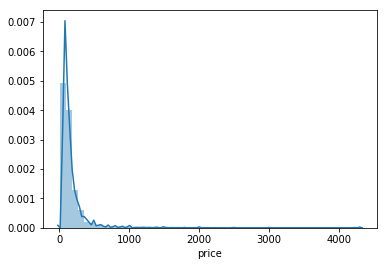

In [15]:
#Price Plot
sns.distplot(clean_data["price"], kde = True)

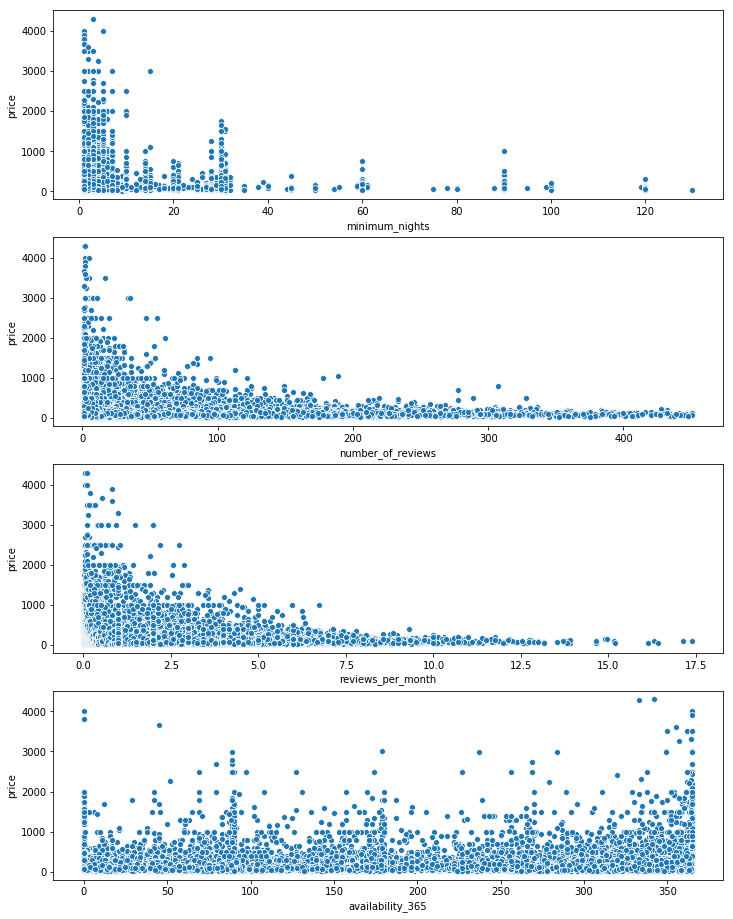

In [16]:
# Plots: Price vs 
fig=plt.figure(figsize=(12,16))
#                  Minimum nights
ax1=fig.add_subplot(411)
sns.scatterplot('minimum_nights','price',data=clean_data,ax=ax1)
#                  Number of reviews 
ax2=fig.add_subplot(412)
sns.scatterplot('number_of_reviews','price',data=clean_data,ax=ax2)
#                  Reviews per month
ax3=fig.add_subplot(413)
sns.scatterplot('reviews_per_month','price',data=clean_data,ax=ax3)
#                  Availability_365
ax4=fig.add_subplot(414)
sns.scatterplot('availability_365','price',data=clean_data,ax=ax4)
plt.show()

According to the plots above, we were able to observe that 'minimum_nights', 'number_of_reviews', 
and 'reviews_per_month' have inverse relationship withs 'price'. However, 'availability 365' doesn't seem to
have any relationship with 'price'.

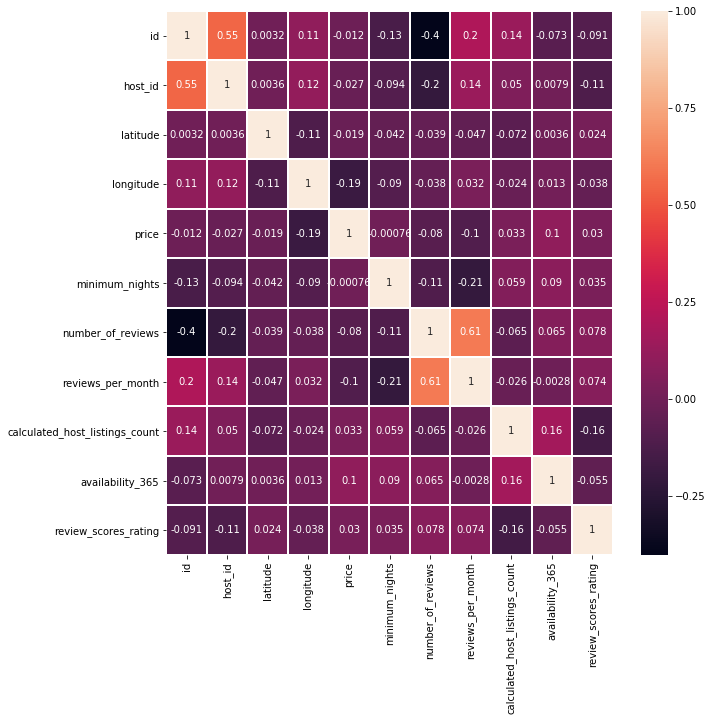

In [17]:
#Correlation plot
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(clean_data.corr(),annot=True,linewidths=1)
plt.show()

There seems to be correlation between number_of_reviews and reviews_per_month. There is also correlation between id and host_id.

# Getting Room Details

In [18]:
#Proportion of Room_type 
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = clean_data.groupby('room_type').size()/clean_data['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

Text(0.5, 0, 'Listing price in $')

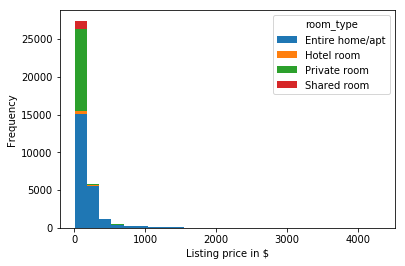

In [19]:
#Plot: Room_type and Price 
clean_data.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

The range of the price varies by the type of the room. The plot above shows that 'Entire home/apt' have the widest price range while 'Private room' and 'Shared room' stay on the lower side. 

Our word cloud shows the words that are more often used in the Name of the listings.

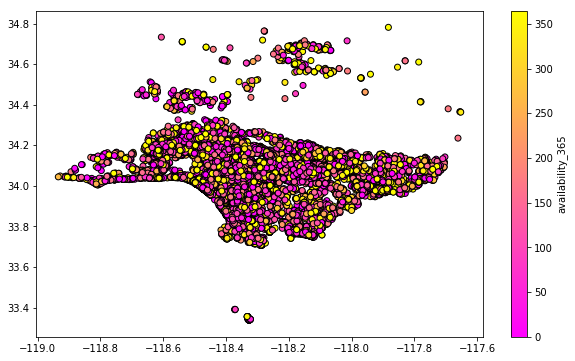

In [20]:
# Room Availability
plt.figure(figsize=(10,6))
plt.scatter(clean_data.longitude, clean_data.latitude, c=clean_data.availability_365, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('availability_365')


<Figure size 720x432 with 0 Axes>

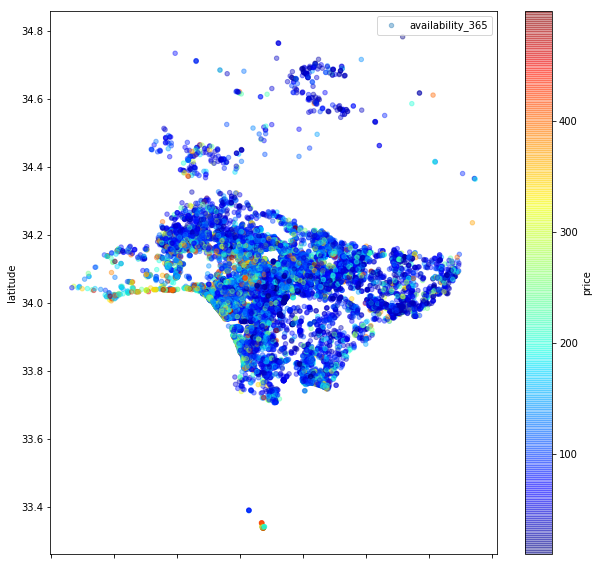

In [21]:
plt.figure(figsize=(10,6))
sub_6=clean_data[clean_data.price<500]
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

Red color dots are the apartment or rooms with higher price.

In [22]:
# Let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=clean_data.host_id.value_counts().head(10)
top_host

124794866    56
4656446      50
21013529     48
101537031    47
120016074    46
178311297    43
3392276      41
23118355     41
80720775     41
161307433    41
Name: host_id, dtype: int64

In [23]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})


[Text(0, 0, '124794866'),
 Text(0, 0, '4656446'),
 Text(0, 0, '21013529'),
 Text(0, 0, '101537031'),
 Text(0, 0, '120016074'),
 Text(0, 0, '178311297'),
 Text(0, 0, '3392276'),
 Text(0, 0, '23118355'),
 Text(0, 0, '80720775'),
 Text(0, 0, '161307433')]

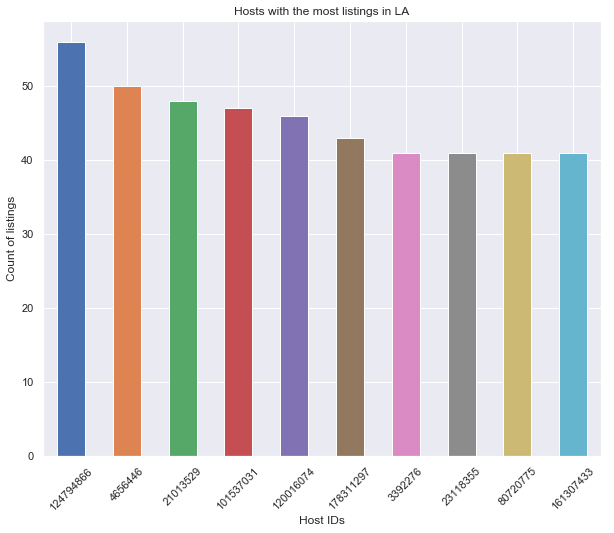

In [24]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in LA')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


In [25]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in clean_data.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
        
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_20_w=Counter(_names_for_count_).most_common()
_top_20_w=_top_20_w[0:20]



#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_20_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

<Figure size 720x432 with 0 Axes>

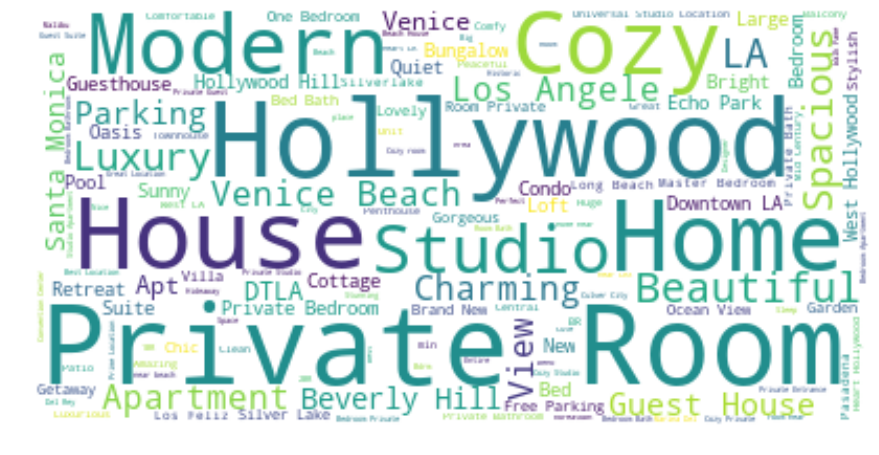

In [26]:
# Word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in clean_data.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

[Text(0, 0, 'in'),
 Text(0, 0, 'private'),
 Text(0, 0, 'room'),
 Text(0, 0, 'the'),
 Text(0, 0, 'hollywood'),
 Text(0, 0, 'home'),
 Text(0, 0, 'with'),
 Text(0, 0, 'beach'),
 Text(0, 0, 'to'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'house'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'of'),
 Text(0, 0, 'la'),
 Text(0, 0, 'and'),
 Text(0, 0, 'near'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '-')]

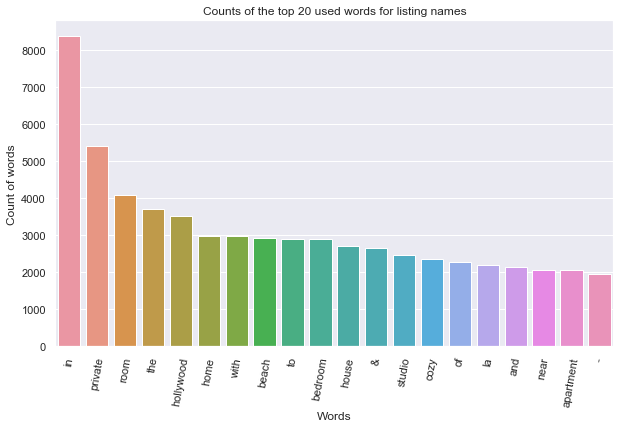

In [27]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 20 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

# Data Modeling

In [28]:
#prepare data for modeling
clean_data.drop(['name','id','host_name'],axis=1,inplace=True)

In [29]:
from sklearn import preprocessing
'''Encode labels with value between 0 and n_classes-1.'''

le = preprocessing.LabelEncoder()
le.fit(clean_data['neighbourhood'])
clean_data['neighbourhood']=le.transform(clean_data['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(clean_data['room_type'])
clean_data['room_type']=le.transform(clean_data['room_type'])

clean_data.sort_values(by='price',ascending=True,inplace=True)

clean_data.head()

host_id  neighbourhood  latitude  longitude  room_type  price  \
22501   10526331            108  34.07580 -118.30548          0     10   
40982  136332616             80  34.17452 -118.28269          0     10   
44193  290371475             62  34.09249 -118.29246          2     10   
30712   38974403             99  34.10172 -118.32295          0     10   
17762  136332616             80  34.17599 -118.28501          0     10   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
22501               9                 40  2019-08-29               2.15   
40982               1                  3  2019-08-13               1.61   
44193               1                  1  2019-09-01               1.00   
30712               1                 21  2019-08-21               2.67   
17762               1                 17  2019-08-18               0.77   

       calculated_host_listings_count  availability_365  \
22501                               3                51   
40982                               9                 0   
44193                               1               224   
30712                               5               349   
17762                               9               364   

                                 listing_url  review_scores_rating  
22501  https://www.airbnb.com/rooms/23149963                  96.0  
40982  https://www.airbnb.com/rooms/36489333                  73.0  
44193  https://www.airbnb.com/rooms/38214061                 100.0  
30712  https://www.airbnb.com/rooms/29684646                  99.0  
17762  https://www.airbnb.com/rooms/19967977                  96.0

## Model Training


In [30]:
## Modeling:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
## Evaluation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import roc_auc_score


# Linear Regression

In [31]:
#Train Linear Regression model

lm = LinearRegression()

X = clean_data[['review_scores_rating','neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = clean_data['price']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = lm.predict(X_test)


In [33]:
accuracies = cross_val_score(estimator = lm, X = X_train,scoring = "neg_mean_squared_error", y = y_train, cv = 10,verbose = 1)


print('')
print('####### Linear Regression #######')

rmse_linear = mean_squared_error(y_test, y_pred)**0.5

print('Test RMSE: %0.4f ' % rmse_linear)


####### Linear Regression #######
Test RMSE: 194.6559 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


# Decision Tree


In [34]:
parameters = {
    #    (fit each decision tree with depths)
    'max_depth': np.arange(1,100)
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
}

model_tree = DecisionTreeRegressor(random_state = 1122)
model_tree.fit(X_train, y_train)

model_treecv = GridSearchCV(model_tree, parameters, cv = 10, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
model_treecv.fit(X_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:   51.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1122, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [35]:
y_predt = model_treecv.predict(X_test)
print('')
print('###### 10-Fold CV Decision Tree ######')

rmse_tree = mean_squared_error(y_test, y_predt)**0.5
print('')
print('Test RMSE: %0.4f ' % rmse_tree)


###### 10-Fold CV Decision Tree ######

Test RMSE: 188.9150 


# Light Gradient Boosting (LGBM)

In [37]:

import lightgbm as lgb

OSError: dlopen(/Users/chan/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/chan/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mean_squared_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
    
}
evals_result={}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,evals_result=evals_result,
                early_stopping_rounds=32)

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse_lgbm = mean_squared_error(y_test, y_pred)**0.5
print('Test RMSE: %0.4f ' % rmse_lgbm)

In [ ]:
rmse_comp = pd.DataFrame({'Linear':[rmse_linear],'Tree':[rmse_tree],'LGBM':[rmse_lgbm]})
rmse_comp.rename(index = {0:'Test RMSE'})

# Conclusion

Looking at the exploratory data analysis of our data, we can retrieve valuable insights regarding the data. The distribution plot of our price variable illustrates that the values are heavily skewed to the right and show that most Airbnb’s are generally less than 500 dollars. Another interesting insight through our EDA  is that price holds several inverse relationships with other variables such as minimum_nights, number_of_reviews, and reviews_per_month. Thus, it would be hard to find a high price associated with a high value of any of the three variables respectively. Using the variables of our dataset, we motivated ourselves to create a predictive model for price. The three statistical models that we utilized to our dataset were Linear Regression, Decision Tree, and Light Gradient Boosting(LGBM). By splitting our data into training and test datasets, we were able to train our models and use Root Mean Squared Error (RMSE) as our cost function to determine the efficiency of our models. Based on the results of our models, we are able to conclude that LGBM is the best model amongst the three in predicting the price. 

# Limitations

A major limitation in our dataset would be that there are inaccurate posts including prices that differ from the actual Airbnb website.   Although this could be due to human error, this is certaInly a flaw to our data, and it is something that must be taken consideration  in the future for a more accurate analysis. Thus, for the scope of this project, we must assume that the data observations we have used are completely correct. Another limitation of our dataset is that some of the observations have radically high and low values. Although some of them are true, some of them are pretty misleading and thus, also could lead to an inaccurate analysis. For our statistical models, we were only able to utilize a limited amount of variables to predict price. This factor is insignificant when it comes to predicting the response variable, but we were discontent with the lack of variables we could use. 